<a href="https://colab.research.google.com/github/rafael2673/AEDII/blob/main/U1T1/trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 1 Unidade 1

## Exercise 2.1:
Suppose you're tossing two coins at the same time. They're loaded in different ways, according to the table below. Calculate the probability of getting all possible outcomes:

<table>
  <tr>
    <td>p1(H)</td>
    <td>p2(H)</td>
    <td>H-H</td>
    <td>H-T</td>
    <td>T-H</td>
    <td>T-T</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>0.5</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>0.6</td>
    <td>0.7</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>0.4</td>
    <td>0.8</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>0.1</td><td>0.2</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
  <tr>
    <td>0.3</td>
    <td>0.4</td>
    <td></td>
    <td></td>
    <td></td>
    <td></td>
  </tr>
</table>

In [ ]:
# Function to calculate probabilities for each outcome
def calculate_probabilities(p1_h, p2_h):
  p1_t = 1 - p1_h
  p2_t = 1 - p2_h
  hh = p1_h * p2_h
  ht = p1_h * p2_t
  th = p1_t * p2_h
  tt = p1_t * p2_t
  return hh, ht, th, tt

# Example usage for the given probabilities
p1_h_list = [0.5, 0.6, 0.4, 0.1, 0.3]
p2_h_list = [0.5, 0.7, 0.8, 0.2, 0.4]

print("Probabilities for each outcome:")
for i in range(len(p1_h_list)):
  hh, ht, th, tt = calculate_probabilities(p1_h_list[i], p2_h_list[i])
  print(f"p1(H)={p1_h_list[i]}, p2(H)={p2_h_list[i]}")
  print(f"  H-H: {hh:.2f}")
  print(f"  H-T: {ht:.2f}")
  print(f"  T-H: {th:.2f}")
  print(f"  T-T: {tt:.2f}")
  print("-" * 20)


Probabilities for each outcome:
p1(H)=0.5, p2(H)=0.5
  H-H: 0.25
  H-T: 0.25
  T-H: 0.25
  T-T: 0.25
--------------------
p1(H)=0.6, p2(H)=0.7
  H-H: 0.42
  H-T: 0.18
  T-H: 0.28
  T-T: 0.12
--------------------
p1(H)=0.4, p2(H)=0.8
  H-H: 0.32
  H-T: 0.08
  T-H: 0.48
  T-T: 0.12
--------------------
p1(H)=0.1, p2(H)=0.2
  H-H: 0.02
  H-T: 0.08
  T-H: 0.18
  T-T: 0.72
--------------------
p1(H)=0.3, p2(H)=0.4
  H-H: 0.12
  H-T: 0.18
  T-H: 0.28
  T-T: 0.42
--------------------


## Exercise 2.2:

60% of the emails hitting my inbox is spam. You design a phenomenal spam filter which is able to tell me, with 98% accuracy, whether an email is spam or not: if an email is not spam, the system has a 98% probability of saying so. The filter knows 60% of emails are spam and so it will flag 60% of my emails. Suppose that, at the end of the week, I look in my spam box and see 963 emails. Use Bayes' Theorem to calculate how many of those 963 emails in my spam box I should suspect to be non-spam.

In [ ]:
# Given:
# P(S) = 0.60 (Probability that an email is spam)
# P(NS) = 0.40 (Probability that an email is not spam)
# P(Pos|S) = 0.98 (Probability that the filter correctly identifies spam)
# P(Neg|NS) = 0.98 (Probability that the filter correctly identifies non-spam)
# P(Pos) = 963 / Total emails (Number of emails flagged as spam)
# We will use Bayes' Theorem to find P(NS|Pos), the probability that a flagged email is non-spam.

# Defining known values
P_S = 0.60
P_NS = 0.40
P_Pos_given_S = 0.98  # Sensitivity
P_Neg_given_NS = 0.98  # Specificity
P_Pos_given_NS = 1 - P_Neg_given_NS  # False positive rate (1 - specificity)
num_flagged_as_spam = 963

# Bayes' Theorem: P(NS|Pos) = (P(Pos|NS) * P(NS)) / P(Pos)
# Where P(Pos) = P(Pos|S) * P(S) + P(Pos|NS) * P(NS)

# Calculate P(Pos), the total probability of an email being flagged as spam
P_Pos = (P_Pos_given_S * P_S) + (P_Pos_given_NS * P_NS)

# Calculate P(NS|Pos), the probability that an email is non-spam given it was flagged as spam
P_NS_given_Pos = (P_Pos_given_NS * P_NS) / P_Pos

# Calculate the number of non-spam emails in the spam box
num_non_spam_in_spam_box = P_NS_given_Pos * num_flagged_as_spam

num_non_spam_in_spam_box

12.926174496644308

## Exercise 2.3:

You're given the string: "OCZ XJMMZXO VINRZM". Each letter follows a stochastic Markov process with the rules expressed by this table. Follow the process for three steps and reconstruct the correct answer. (Note, this is a Caesar cipher with shift 7 applied three times, because the Caesar cipher is a Markov process).

In [ ]:
# Function to apply Caesar cipher shift (both forward and backward)
def caesar_shift(text, shift):
    result = []
    for char in text:
        if char.isalpha():  # Only shift alphabetic characters
            shift_base = 65 if char.isupper() else 97  # ASCII base for upper/lowercase letters
            shifted = chr((ord(char) - shift_base - shift) % 26 + shift_base)
            result.append(shifted)
        else:
            result.append(char)  # Non-alphabetic characters remain unchanged
    return ''.join(result)

# Given string and shift of 7 applied three times
cipher_text = "OCZ XJMMZXO VINRZM"
shift = 7

# Apply the inverse shift (-7) three times
decrypted_step_1 = caesar_shift(cipher_text, shift)
decrypted_step_2 = caesar_shift(decrypted_step_1, shift)
decrypted_step_3 = caesar_shift(decrypted_step_2, shift)

print("Descripted message:", decrypted_step_3)  # This should give us the final decrypted message


Descripted message: THE CORRECT ANSWER


## Exercise 2.4:
Draw the probability mass function and the cumulative distribution of the following outcome probabilities:
<table>
  <tr>
    <td>
      Outcome
    </td>
    <td>
      p
    </td>
  </tr>
  <tr>
    <td>
      1
    </td>
    <td>
      0.1
    </td>
  </tr>
  <tr>
    <td>
      2
    </td>
    <td>
      0.15
    </td>
  </tr>
  <tr>
    <td>
      3
    </td>
    <td>
      0.2
    </td>
  </tr>
  <tr>
    <td>
      4
    </td>
    <td>
      0.21
    </td>
  </tr>
  <tr>
    <td>
      5
    </td>
    <td>
      0.17
    </td>
  </tr>
  <tr>
    <td>
      6
    </td>
    <td>
      0.09
    </td>
  </tr>
  <tr>
    <td>
      7
    </td>
    <td>
      0.06
    </td>
  </tr>
  <tr>
    <td>
      8
    </td>
    <td>
      0.02
    </td>
  </tr>
<table>

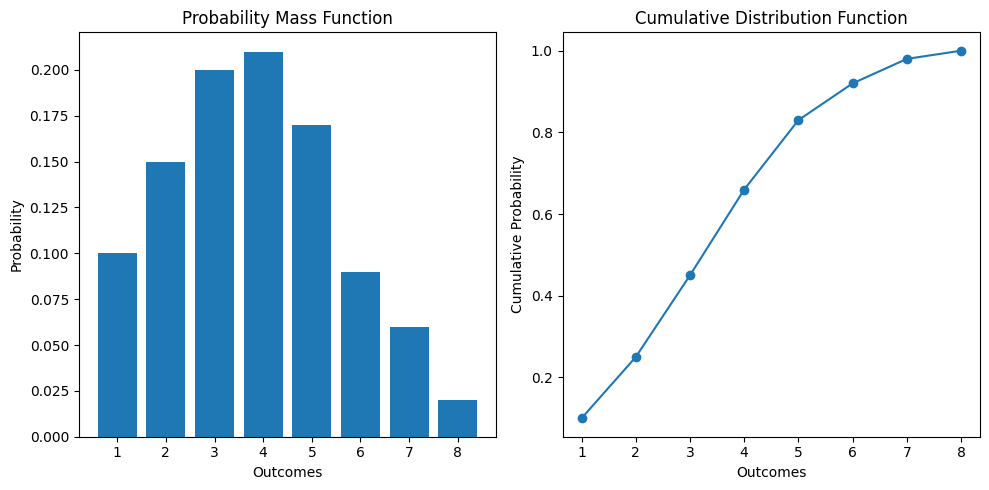

In [ ]:
import matplotlib.pyplot as plt

# Define the outcome probabilities
outcomes = [1, 2, 3, 4, 5, 6, 7, 8]
probabilities = [0.1, 0.15, 0.2, 0.21, 0.17, 0.09, 0.06, 0.02]

# Probability Mass Function (PMF)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(outcomes, probabilities)
plt.xlabel("Outcomes")
plt.ylabel("Probability")
plt.title("Probability Mass Function")

# Cumulative Distribution Function (CDF)
cumulative_probabilities = [sum(probabilities[:i+1]) for i in range(len(probabilities))]
plt.subplot(1, 2, 2)
plt.plot(outcomes, cumulative_probabilities, marker='o')
plt.xlabel("Outcomes")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function")

plt.tight_layout()
plt.show()


## Exercise 2.5:
How many bits do we need to independently encode v1 and v2 from [this data](https://www.networkatlas.eu/exercises/2/5/data.txt)? How much would we save in encoding v1 if we knew v2?

In [ ]:
from sklearn.metrics import mutual_info_score
from scipy.stats import entropy
import pandas as pd

# Load the data
df = pd.read_csv("/content/sample_data/data.txt", sep="\t")

# Calculate the probabilities for v1 and v2
v1_ps = (df.groupby(by="v1").size() / df.shape[0]).values
v2_ps = (df.groupby(by="v2").size() / df.shape[0]).values

# Calculate entropy of v1 and v2
v1_info = entropy(v1_ps)
v2_info = entropy(v2_ps)

# Calculate the mutual information between v1 and v2
mi = mutual_info_score(df['v1'], df['v2'])

# Calculate the percentage of v1 that is explained by knowing v2
savings_percentage = 100 * mi / v1_info

print("Entropy of v1:", v1_info)
print("Entropy of v2:", v2_info)
print("Mutual Information:", mi)
print(f"Knowing v2 gives us {savings_percentage:.2f}% of v1")



Entropy of v1: 1.7523574424617165
Entropy of v2: 1.981205349788966
Mutual Information: 0.7982406296004763
Knowing v2 gives us 45.55% of v1


## Exercise 3.1:
Calculate |V| and |E| for the graph in the Figure.

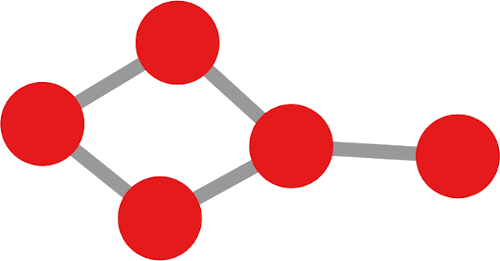


5 nós e 5 bordas

|V|=5

|E|=5

## Exercise 3.2:
Mr. A is friend with Mrs. B, but she doesn't like him back. She has a reciprocal friendship with both C and D, but only C considers D a friend. D has also sent friend requests to E, F, G, and H but, so far, only G replied. G also has a reciprocal relationship with A. Draw the corresponding directed graph.



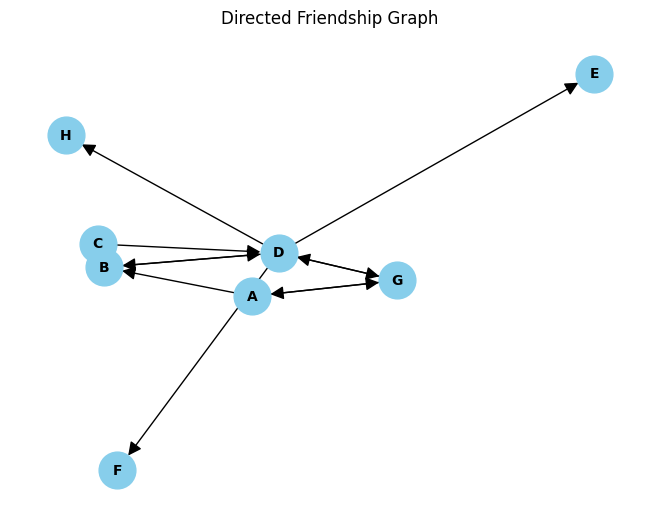

In [16]:
# prompt: Mr. A is friend with Mrs. B, but she doesn't like him back. She has a reciprocal friendship with both C and D, but only C considers D a friend. D has also sent friend requests to E, F, G, and H but, so far, only G replied. G also has a reciprocal relationship with A. Draw the corresponding directed graph with visible edge relation.

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
graph = nx.DiGraph()

# Add edges representing friendships
graph.add_edge('A', 'B')  # A is friends with B, but B doesn't like A back
graph.add_edge('B', 'C')  # B and C are reciprocal friends
graph.add_edge('C', 'B')
graph.add_edge('B', 'D')  # B and D are reciprocal friends
graph.add_edge('D', 'B')
graph.add_edge('C', 'D')  # C considers D a friend, but D doesn't consider C a friend
graph.add_edge('D', 'E')  # D sent a friend request to E
graph.add_edge('D', 'F')  # D sent a friend request to F
graph.add_edge('D', 'H')  # D sent a friend request to H, but only G replied
graph.add_edge('D', 'G')  # D sent a friend request to G, and G replied
graph.add_edge('G', 'D')  # G and D are reciprocal friends
graph.add_edge('G', 'A')  # G and A are reciprocal friends
graph.add_edge('A', 'G')

# Draw the graph with visible edge relations
pos = nx.spring_layout(graph)  # You can try different layout algorithms
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Directed Friendship Graph')
plt.show()


## Exercise 3.3:
Draw the graph from Exercise 3.2 (image below) as undirected and weighted, with the weight being 2 if the connection is reciprocal, 1 otherwise.

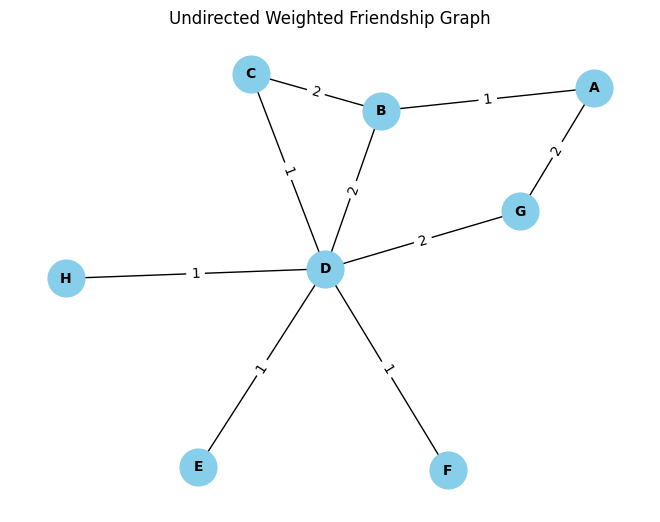

In [18]:
import matplotlib.pyplot as plt
# Create an undirected graph
undirected_graph = nx.Graph()

# Iterate through edges in the directed graph
for u, v in graph.edges():
  if graph.has_edge(v, u):  # Check for reciprocal edge
    undirected_graph.add_edge(u, v, weight=2)
  else:
    undirected_graph.add_edge(u, v, weight=1)

# Draw the undirected weighted graph
pos = nx.spring_layout(undirected_graph)
nx.draw(undirected_graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(undirected_graph, 'weight')
nx.draw_networkx_edge_labels(undirected_graph, pos, edge_labels=labels)
plt.title('Undirected Weighted Friendship Graph')
plt.show()

## Exercise 3.4:
Draw a correlation network for [these vectors](https://www.networkatlas.eu/exercises/3/4/data.txt), by only drawing edges with positive weights, ignoring self loops.

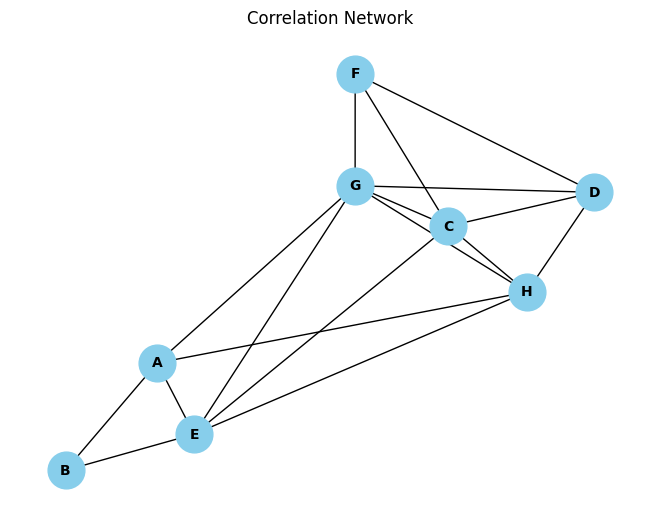

In [26]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the data from the provided URL
data = pd.read_csv('/content/sample_data/vectors.txt', sep='\t')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a undirected graph
graph = nx.Graph()

# Iterate through the correlation matrix and add edges with positive weights, excluding self-loops
for i in correlation_matrix.index:
  for j in correlation_matrix.columns:
    if i != j and correlation_matrix.loc[i, j] > 0:
      graph.add_edge(i, j, weight=correlation_matrix.loc[i, j])


# Draw the graph
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels='')
plt.title('Correlation Network')
plt.show()

## Exercise 4.1:
[This network](https://www.networkatlas.eu/exercises/4/1/data.txt) is bipartite. Identify the nodes in either type and find the nodes, in either type, with the most neighbors.

In [27]:
import pandas as pd
from collections import defaultdict

# Load the data from the file
file_path = '/content/sample_data/datalist.txt'
edges = pd.read_csv(file_path, sep=" ", header=None, names=['node1', 'node2'])

# Create dictionaries to store the neighbors of each node
neighbors_A = defaultdict(set)
neighbors_B = defaultdict(set)

# Classify nodes into two types (Type A and Type B) based on how they are connected
# Assume Type A is on one side, Type B on the other
for _, row in edges.iterrows():
    node1, node2 = row['node1'], row['node2']

    # Add the neighbors to both nodes
    neighbors_A[node1].add(node2)
    neighbors_B[node2].add(node1)

# Calculate the number of neighbors for each node
neighbor_count_A = {node: len(neighbors) for node, neighbors in neighbors_A.items()}
neighbor_count_B = {node: len(neighbors) for node, neighbors in neighbors_B.items()}

# Find the nodes with the most neighbors in each type
max_neighbors_A = max(neighbor_count_A, key=neighbor_count_A.get)
max_neighbors_B = max(neighbor_count_B, key=neighbor_count_B.get)

max_neighbors_A, neighbor_count_A[max_neighbors_A], max_neighbors_B, neighbor_count_B[max_neighbors_B]

(131, 4, 2, 59)

## Exercise 4.2:
This network is multilayer. The data has three columns: source and target node, and edge type. The edge type is either the numerical id of the layer, or "C" for an inter-layer coupling. Given that this is a one-to-one multilayer network, determine whether this network has a star, clique or chain coupling.

In [37]:
import networkx as nx
from collections import defaultdict

# Load the data. We need to import as multigraph, or networkx will collapse the edges.
# We also need to make sure to import the edge type information.
Graph = nx.read_edgelist("/content/sample_data/network1.txt", create_using=nx.MultiGraph(), data=[("edgetype", str)])

# Determine how many layers we have
layers = len(set(e[2]["edgetype"] for e in Graph.edges(data=True))) - 1

# Initialize dictionary to count coupling edges for each node
node_cedges = defaultdict(int)

# Iterate over the edges to count coupling edges
for u, v, data in Graph.edges(data=True):
    if data['edgetype'] == "C":
        node_cedges[u] += 1
        node_cedges[v] += 1

# Count nodes with coupling edges
coupling_degrees = list(node_cedges.values())
max_degree = max(coupling_degrees)
min_degree = min(coupling_degrees)

# Determine coupling structure
if max_degree == 2 and len(coupling_degrees) > 0:
    print("Chain coupling")
elif min_degree > 1:
    print("Clique coupling")
elif set(coupling_degrees) == {1, layers - 1}:
    print("Star coupling")
else:
    print("The network has a different coupling structure.")


Star coupling


## Exercise 4.3:
[This network](https://www.networkatlas.eu/exercises/4/3/data.txt) is a hypergraph, with a hyperedge per line. Transform it in a unipartite network in which each hyperedge is split in edges connecting all nodes in the hyperedge. Then transform it into a bipartite network in which each hyperedge is a node of one type and its nodes connect to it.

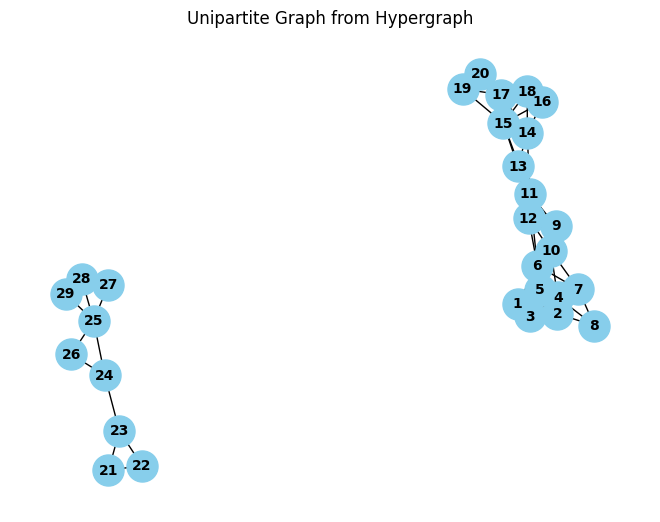

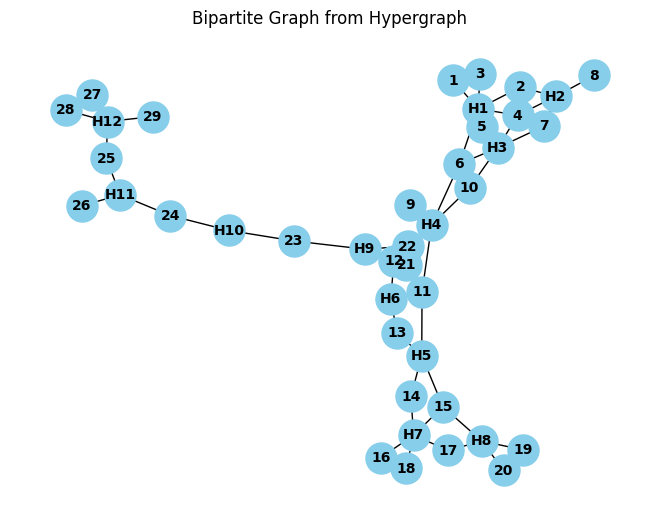

In [38]:
import matplotlib.pyplot as plt
hyperedges = []
with open("/content/sample_data/network2.txt", 'r') as f:
   for line in f:
      hyperedges.append(line.strip().split())


# Function to transform hypergraph to unipartite graph
def hypergraph_to_unipartite(hyperedges):
    unipartite_graph = nx.Graph()
    for hyperedge in hyperedges:
        for i in range(len(hyperedge)):
            for j in range(i + 1, len(hyperedge)):
                unipartite_graph.add_edge(hyperedge[i], hyperedge[j])
    return unipartite_graph

# Function to transform hypergraph to bipartite graph
def hypergraph_to_bipartite(hyperedges):
    bipartite_graph = nx.Graph()
    for i, hyperedge in enumerate(hyperedges):
        hyperedge_node = f"H{i+1}"  # Create a unique node for each hyperedge
        bipartite_graph.add_node(hyperedge_node, bipartite=0)  # Hyperedge nodes
        for node in hyperedge:
            bipartite_graph.add_node(node, bipartite=1)  # Original nodes
            bipartite_graph.add_edge(hyperedge_node, node)
    return bipartite_graph

# Transform the hypergraph to unipartite and bipartite
unipartite_graph = hypergraph_to_unipartite(hyperedges)
bipartite_graph = hypergraph_to_bipartite(hyperedges)


# Draw the graphs (optional)
pos_unipartite = nx.spring_layout(unipartite_graph)
nx.draw(unipartite_graph, pos_unipartite, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Unipartite Graph from Hypergraph')
plt.show()


pos_bipartite = nx.spring_layout(bipartite_graph)
nx.draw(bipartite_graph, pos_bipartite, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Bipartite Graph from Hypergraph')
plt.show()


## Exercise 4.4:

This network is dynamic, the third and fourth columns of the edge list tell you the first and last snapshot in which the edge was continuously present. An edge can reappear if the edge was present in two discontinuous time periods. Aggregate it using a disjoint window of size 3.

In [47]:
import networkx as nx

def aggregate_dynamic_network(edge_list, window_size):
  """Aggregates a dynamic network using a disjoint window."""

  aggregated_network = nx.Graph()
  # Iterate through edges with data
  for source, target, data in edge_list.edges(data=True):
    start_time = data['start']  # Access start time
    end_time = data['end']  # Access end time
    for i in range(start_time, end_time + 1, window_size):
      window_start = i
      window_end = min(i + window_size - 1, end_time)

      if window_start <= window_end:
          aggregated_network.add_edge(source, target)

  return aggregated_network


# Example usage:
edge_list = nx.read_edgelist("/content/sample_data/network3.txt", create_using = nx.MultiGraph(), data = [("start", int), ("end", int)])

window_size = 3
aggregated_graph = aggregate_dynamic_network(edge_list, window_size)

print("Aggregated Graph:")
for edge in aggregated_graph.edges():
    print(edge)

Aggregated Graph:
('1', '2')
('1', '3')
('1', '4')
('1', '5')
('2', '3')
('2', '4')
('3', '5')
('3', '6')
('4', '7')
('5', '8')
('5', '9')
('5', '10')
('5', '11')
('6', '12')
('6', '13')
('7', '12')
